# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [19]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [20]:
data = pd.read_csv("Datasets/COMPLETE_FULLDATA.csv",sep=",", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.000358,-0.000230,3.0,0,0.006596,1.671243,0.000055,2.039965,0.712887,0.368723
1,ND3X0.2,-0.000358,0.539103,3.0,0,0.006328,1.689789,0.000402,2.040880,0.712912,0.351091
2,ND3X0.4,-0.000358,1.078436,3.0,0,0.005679,1.718518,0.000387,2.031394,0.708976,0.312876
3,ND3X0.6,-0.000358,1.617770,3.0,0,0.004892,1.769175,0.000005,2.034753,0.714190,0.265579
4,ND3X0.8,-0.000358,2.157103,3.0,0,0.004065,1.804709,0.000001,2.026748,0.710577,0.222039


Visualizing dataset dimensions

In [21]:
data.shape

(10560, 11)

In [22]:
data['alpha_deg'].unique()

array([  0,   5,  10,  15,  30,  45,  60,  70,  80,  90, 100, 110, 120,
       150, 180, 210, 240, 270, 300, 330], dtype=int64)

In [23]:
removed_angles = [60]
data_removed = data[~data['alpha_deg'].isin(removed_angles)]
data_angles = data[data['alpha_deg'].isin(removed_angles)]

In [24]:
data_angles

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
3168,ND3.0X60X0.0,0.174567,-0.031985,3.000018,60,-0.003031,1.766596,0.157548,1.936107,0.512889,0.169511
3169,ND3.0X60X0.2,0.174567,0.507349,3.000019,60,-0.003014,1.774834,0.157279,1.947321,0.511225,0.172487
3170,ND3.0X60X0.4,0.174567,1.046681,3.000018,60,-0.002838,1.783533,0.158003,1.946134,0.511778,0.162601
3171,ND3.0X60X0.6,0.174567,1.586015,3.000019,60,-0.002481,1.815090,0.157392,1.957048,0.505286,0.141959
3172,ND3.0X60X0.8,0.174567,2.125348,3.000019,60,-0.002064,1.848600,0.158402,1.963064,0.504577,0.114465
...,...,...,...,...,...,...,...,...,...,...,...
3691,ND9.5X60X90d3.4,-8.994873,-0.032484,9.498221,60,-0.000207,1.893967,0.169784,1.905302,0.508418,0.011335
3692,ND9.5X60X90d3.6,-9.534207,-0.032483,9.498115,60,-0.000193,1.894475,0.169849,1.905060,0.508336,0.010585
3693,ND9.5X60X90d3.8,-10.073540,-0.032484,9.498010,60,-0.000180,1.894962,0.169926,1.904834,0.508244,0.009872
3694,ND9.5X60X90d4.0,-10.612873,-0.032484,9.497904,60,-0.000168,1.895427,0.170006,1.904623,0.508151,0.009196


Input features and output variable selection

In [25]:
X_train = data_removed[["Xshift","Yshift","Zshift","alpha_deg"]].values
y_train = data_removed["CPL"].values*1000 #mev multiplication
X_test = data_angles[["Xshift","Yshift","Zshift","alpha_deg"]].values
y_test = data_angles["CPL"].values*1000 #mev multiplication

In [26]:
indices = np.random.permutation(len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]

Splitting of the data into train set and test set

Scaling of input features

In [27]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [28]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [29]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

Number of epochs used for training

In [31]:
num_epochs = 500

Neural Network training

In [32]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
283/283 [==============================] - 1s 3ms/step - loss: 1.3915 - val_loss: 1.3850
Epoch 2/500
283/283 [==============================] - 1s 3ms/step - loss: 1.1404 - val_loss: 1.0845
Epoch 3/500
283/283 [==============================] - 1s 3ms/step - loss: 1.0302 - val_loss: 1.1181
Epoch 4/500
283/283 [==============================] - 1s 3ms/step - loss: 0.9872 - val_loss: 1.0296
Epoch 5/500
283/283 [==============================] - 1s 3ms/step - loss: 0.9140 - val_loss: 0.9637
Epoch 6/500
283/283 [==============================] - 1s 3ms/step - loss: 0.9364 - val_loss: 1.0187
Epoch 7/500
283/283 [==============================] - 1s 2ms/step - loss: 0.8583 - val_loss: 0.9586
Epoch 8/500
283/283 [==============================] - 1s 2ms/step - loss: 0.8225 - val_loss: 0.9339
Epoch 9/500
283/283 [==============================] - 1s 3ms/step - loss: 0.8163 - val_loss: 0.9099
Epoch 10/500
283/283 [==============================] - 1s 3ms/step - loss: 0.7915 - val_lo

# Model Evaluation

In [33]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.1230


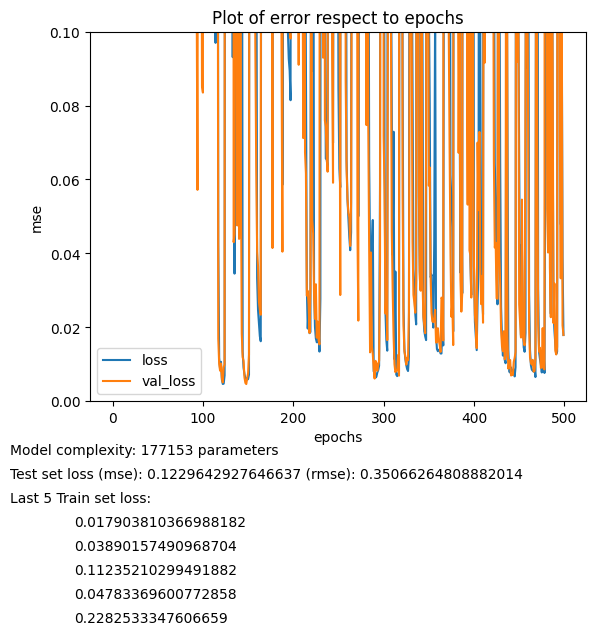

In [34]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [35]:
#emp_test = np.array([-2.9219,3.009,4.4996,45])
#emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [36]:
#model.predict(emp_test)

# Scatter plot

In [37]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [38]:
pred = predictions(X_test)

In [39]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.12296429210356949

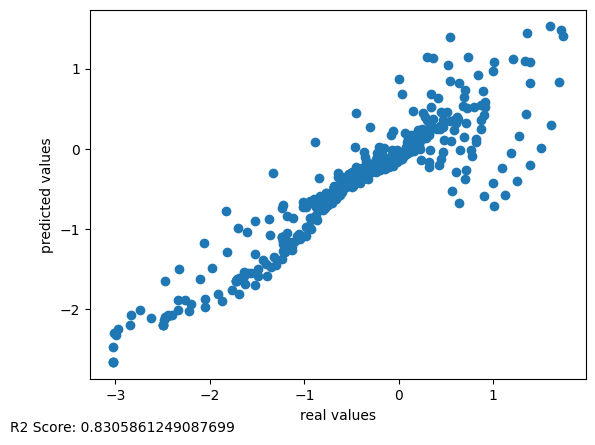

In [41]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [ ]:
#model.save('CPL_meV.h5')